In [12]:
#Load dependencies and 
include("custom_code/utilities.jl")
include("custom_code/plot_data.jl")
include("custom_code/model_routines.jl")
close("all")

In [13]:
#Load data
S = Spec("specs.yml")
D = readtable(joinpath(S.path, "map_curated.csv"));
H = D[D[:celltype] .== "HeLa", :]
HR = H[H[:treatment] .== "RO-3306", :]
HN = H[H[:treatment] .== "noc_only", :]
HN = HN[HN[:ana] .!= 0.0, :]
hctrl = [id for id in H[H[:treatment] .== "untreated", :cell_id]]

R = D[D[:celltype] .== "RPE1", :]
RR = R[R[:treatment] .== "RO-3306", :]
RN = R[R[:treatment] .== "noc_only", :]
RN = RN[RN[:ana] .!= 0.0, :]

hro = Dict([d => [id for id in HR[HR[:dose_uM] .== d,:][:cell_id]] for d in unique(HR[:dose_uM])])
rro = Dict([d => [id for id in RR[RR[:dose_uM] .== d,:][:cell_id]] for d in unique(RR[:dose_uM])])
hro[0.0] = [id for id in HN[:cell_id]]
rro[0.0] = [id for id in RN[:cell_id]]

5-element Array{Any,1}:
 "2919_D7S1 (3)"
 "2919_D7S1 (5)"
 "3331_F4S1 (2)"
 "3331_F4S3 (2)"
 "3331_F4S4 (2)"

In [14]:
function plot_inh(hdose, rdose; xmax = 100, ymax = 1.2, w = 15, h = 6, orient = "side")
    ylabel = Dict(
    "HeLa" => "securin-mEGFP",
    "RPE1" => "cyclin B1-Venus"
    )
  if orient == "side"
    sp = Dict(
    "HeLa" => subplot(121),
    "RPE1" => subplot(122)
    )
  elseif orient == "top"
    sp = Dict(
    "HeLa" => subplot(211),
    "RPE1" => subplot(212)
    )
  end

  for k in keys(sp)
   sp[k][:set_xlim]([0,xmax])
   sp[k][:set_ylim]([0,ymax])
   sp[k][:set_xlabel]("time after RO-3306 addition (min)")
   sp[k][:set_ylabel](ylabel[k])
   sp[k][:set_title](k)
  end


  for d in sort([k for k in keys(hdose)])
    for (n,i) in enumerate(hro[d])
      plotcell(sp["HeLa"], D, i; color = hdose[d],
                label = n == 1 ? "$d\ uM" : "", alpha = 0.5)
    end
  end
  sp["HeLa"][:legend]()

  for d in sort([k for k in keys(rdose)])
    for (n,i) in enumerate(rro[d])
      plotcell(sp["RPE1"], D, i; color = rdose[d],
                label = n == 1 ? "$d\ uM" : "", alpha = 0.5)
    end
  end
  sp["RPE1"][:legend]()
end

plot_inh (generic function with 1 method)

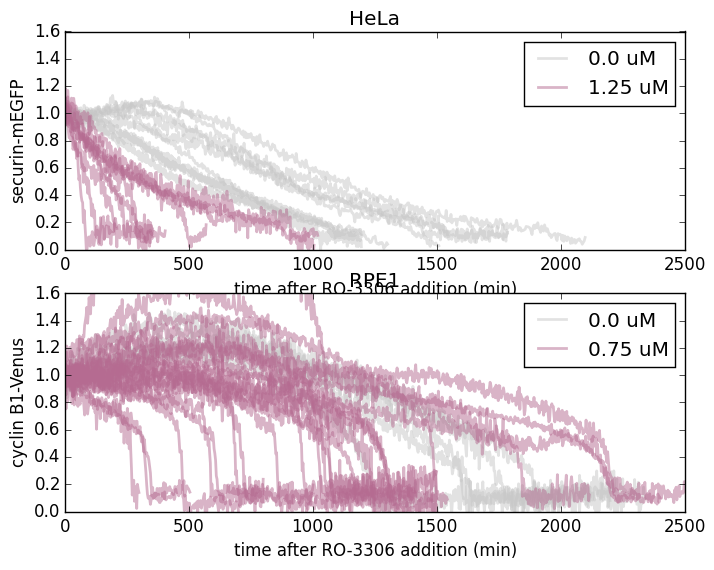

PyObject <matplotlib.legend.Legend object at 0x7f2a3d943310>

In [15]:
plot_inh(
  Dict(
    0.0 => "#c7c7c7",
    1.25 => "#B56B91",
    # 1.7 => "#075251",
    # 13.3 => "#F4806D"
    ),
  Dict(
    0.0 => "#c7c7c7",
    0.75 => "#B56B91",
    # 1.5 => "#075251",
    # 10.0 => "#F4806D",
    );
  xmax = 2500,
  ymax = 1.6,
  w = 15,
  orient = "top",
  h = 15
)